In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
sys.path.insert(0,"/nbi/nbicmplx/cell/dhm160/Masters-thesis/")
from Plaque_model import *
from Initial_values import *
from Plotters import *

# First run the simulations to analyze

In [2]:
# r-mutant
V = DVS(dr = 5,Rmax = 3*10**3)
y0 = IVS("MP0",V)
t = 3*60
sim = MPShell("MP0",y0,V,t,frames=int(t/5))


100%|██████████| 1080000/1080000 [02:19<00:00, 7756.03it/s]


In [3]:
# Wild-type
V.f_tau = 10
V.f_beta = 1
y01 = IVS("MP1",V)
sim1 = MPShell("MP1",y01,V,t,frames = int(t/5))

100%|██████████| 1080000/1080000 [05:02<00:00, 3568.44it/s]


# Check they look good

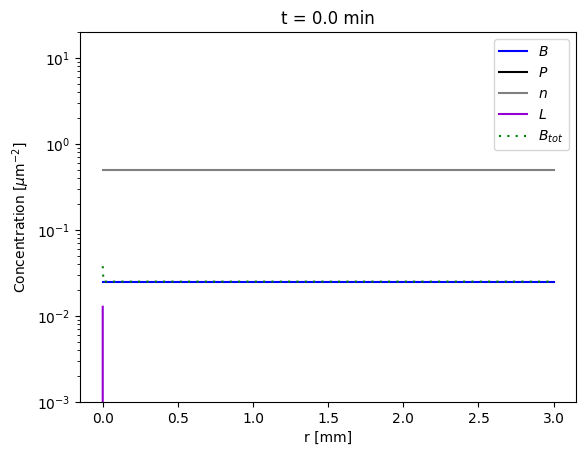

In [78]:
GifGenerator(sim,V,t,"MP0",f"MP0frontanalysis",ylim = (0.001,20),legendloc = "upper right",Btot = True)


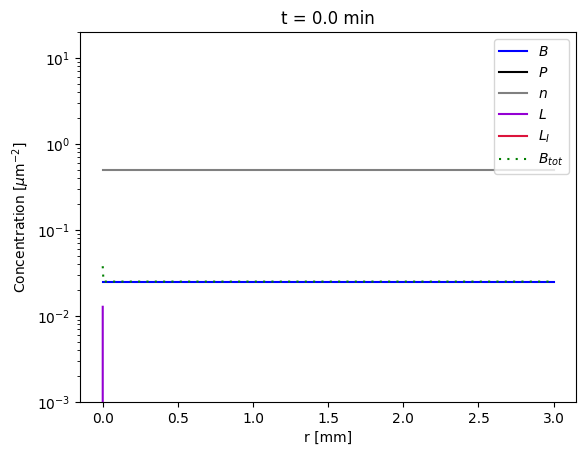

In [79]:
GifGenerator(sim1,V,t,"MP1",f"MP1frontanalysis",ylim = (0.001,20),legendloc = "upper right",Btot = True)

### The commented code below is meant to check whther Pfront gives the right thing

In [4]:
#frame = 1
#Pfrontarr = Pfront(sim,V)
#rarr = np.linspace(0,V.Rmax,V.l)/1000
#y = sim[frame]
#gn0          = Gamma(V.gnmax,V.n0,V.Kn)
#gn           = Gamma(V.gnmax,y[-1],V.Kn)
#beta         = Beta(V.beta0 ,V.rb,gn0,gn)
#tau          = Tau(V.tau0   ,V.rl,gn0,gn)/V.N
#DMP =  V.DP*Matrix(V.l)/V.dr**2
#burst = beta*y[V.N]/tau
#diff = DMP*y[-2]

#plt.plot(rarr,burst/diff,label = "Burst/Diffusion")
#plt.plot(rarr,np.ones_like(y[-2]),color = "gray",alpha = 0.5)
#plt.legend()
#plt.yscale("log")
#plt.figure()
#plt.plot(rarr,y[-2])
#plt.plot(np.ones(10)*Pfrontarr[frame],np.linspace(0,max(y[-2]),10),color = "k",alpha = 0.3,ls = "--")

In [5]:
#frame = 1
#Pfrontarr1 = Pfront(sim1,V,LIN = True)
#rarr = np.linspace(0,V.Rmax,V.l)/1000
#y = sim1[frame]
#gn0          = Gamma(V.gnmax,V.n0,V.Kn)
#gn           = Gamma(V.gnmax,y[-1],V.Kn)
#beta         = Beta(V.beta0 ,V.rb,gn0,gn)
#tau          = Tau(V.tau0   ,V.rl,gn0,gn)/V.N
#DMP =  V.DP*Matrix(V.l)/V.dr**2
#burst = beta*y[V.N]/tau + beta*V.f_beta*y[2*V.N]/tau/V.f_tau
#diff = DMP*y[-2]


#plt.plot(rarr,burst/diff,label = "Burst/Diffusion")
#plt.plot(rarr,np.ones_like(y[-2]),color = "gray",alpha = 0.5)
#plt.plot(np.ones(10)*Pfrontarr1[frame],np.linspace(0,max(abs(beta*y[V.N]/tau/(DMP*y[-2]))),10),color = "k",alpha = 0.3,ls = "--")
#plt.legend()
#plt.ylim(1E-3,max(beta*y[V.N]/tau/(DMP*y[-2]))*1.5)
#plt.yscale("log")
#plt.figure()
#plt.plot(rarr,y[-2])
#plt.plot(np.ones(10)*Pfrontarr1[frame],np.linspace(0,max(y[-2]),10),color = "k",alpha = 0.3,ls = "--")

# Make the front time series

In [9]:
tarr = np.linspace(0,t,len(sim))
rhalfarr = rhalf(sim,False,V, var = "Btot")
Pfrontarr = Pfront(sim,V)
ZOIarr = rhalf(sim,False,V,var = "B")
Pdetarr = Pdet(sim,V,y0[0,0])
rsuperarr = rsuper(sim,V)

tarr1 = np.linspace(0,t,len(sim1))
rhalfarr1 = rhalf(sim1,True,V,var = "Btot")
Pfrontarr1 = Pfront(sim1,V,LIN = True)
ZOIarr1 = rhalf(sim1,True,V,var = "B")
Pdetarr1 = Pdet(sim1,V,y01[0,0])
rsuperarr1 = rsuper(sim1,V)


# Make the front velocity time series

In [10]:
vrhalf = (rhalfarr[1:]-rhalfarr[:-1])/(tarr[1]-tarr[0])
vPfront = (Pfrontarr[1:]-Pfrontarr[:-1])/(tarr[1]-tarr[0])
vZOI = (ZOIarr[1:]-ZOIarr[:-1])/(tarr[1]-tarr[0])
vrsuper = (rsuperarr[1:]-rsuperarr[:-1])/(tarr[1]-tarr[0])
vPdet = (Pdetarr[1:]-Pdetarr[:-1])/(tarr[1]-tarr[0])
vrhalf1 = (rhalfarr1[1:]-rhalfarr1[:-1])/(tarr[1]-tarr[0])
vPfront1 = (Pfrontarr1[1:]-Pfrontarr1[:-1])/(tarr[1]-tarr[0])
vZOI1 = (ZOIarr1[1:]-ZOIarr1[:-1])/(tarr[1]-tarr[0])
vrsuper1 = (rsuperarr1[1:]-rsuperarr1[:-1])/(tarr[1]-tarr[0])
vPdet1 = (Pdetarr1[1:]-Pdetarr1[:-1])/(tarr[1]-tarr[0])

# Define expansion phase

In [11]:
for i,v in enumerate(vrsuper):
    if v >= max(vrsuper)*0.8:
        expansionstart = tarr[i]
        break
for i,v in enumerate(vrsuper[::-1]):
    if v >= max(vrsuper)*0.85:
        expansionend = tarr[-i-2]
        break
expansionstart,expansionend

for i,v in enumerate(vrsuper1):
    if v >= max(vrsuper1)*0.8:
        expansionstart1 = tarr[i]
        break
for i,v in enumerate(vrsuper1[::-1]):
    if v >= max(vrsuper1)*0.85:
        expansionend1 = tarr[-i-2]
        break
expansionstart1,expansionend1

(36.0, 87.42857142857143)

# Plot and check the expansion phase makes sense

Text(0.5, 1.0, 'MP1')

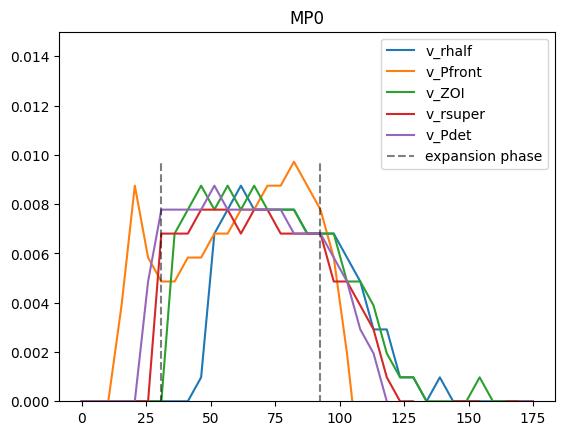

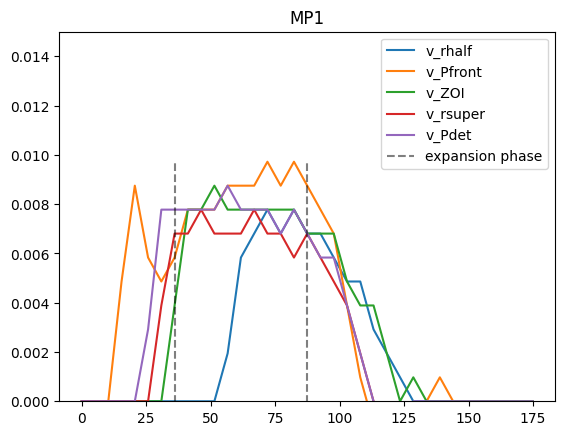

In [13]:
plt.plot(tarr[:-1],vrhalf,label = "v_rhalf")
plt.plot(tarr[:-1],vPfront,label = "v_Pfront")
plt.plot(tarr[:-1],vZOI,label = "v_ZOI")
plt.plot(tarr[:-1],vrsuper,label = "v_rsuper")
plt.plot(tarr[:-1],vPdet,label = "v_Pdet")
plt.plot(np.ones(10)*expansionstart,np.linspace(min(vPfront),max(vPfront),10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend,np.linspace(min(vPfront),max(vPfront),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()
plt.ylim(0,0.015)
plt.title("MP0")

plt.figure()
plt.plot(tarr[:-1],vrhalf1,label = "v_rhalf")
plt.plot(tarr[:-1],vPfront1,label = "v_Pfront")
plt.plot(tarr[:-1],vZOI1,label = "v_ZOI")
plt.plot(tarr[:-1],vrsuper1,label = "v_rsuper")
plt.plot(tarr[:-1],vPdet1,label = "v_Pdet")
plt.plot(np.ones(10)*expansionstart1,np.linspace(min(vPfront1),max(vPfront1),10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend1,np.linspace(min(vPfront1),max(vPfront1),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()
plt.ylim(0,0.015)
plt.title("MP1")

In [14]:
#plt.plot(tarr[:-1],vrsuper,label = "v_rsuper")
#plt.plot(tarr[:-1],vrsuper1,label = "v_rsuper")

Text(0.5, 1.0, 'MP1')

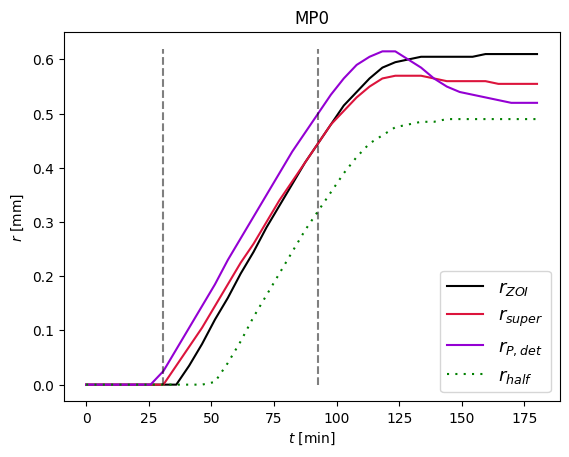

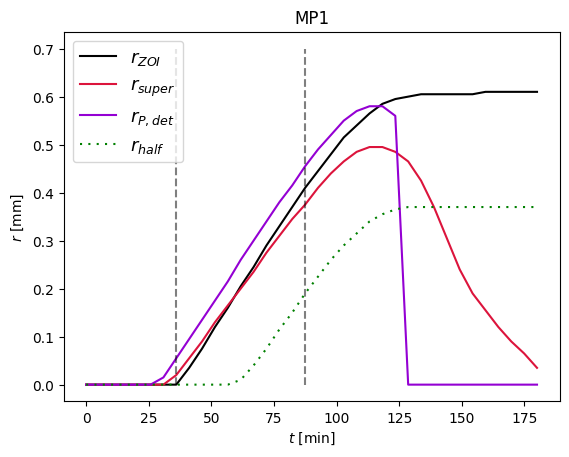

In [15]:
#plt.plot(tarr,Pfrontarr,label = r"$r_{front}$",color = "k")
plt.plot(tarr,ZOIarr,label = r"$r_{ZOI}$",color = "k")
plt.plot(tarr,rsuperarr,label = r"$r_{super}$",color = "crimson")
plt.plot(tarr,Pdetarr,label = r"$r_{P,det}$",color = "darkviolet")
plt.plot(tarr,rhalfarr,label = r"$r_{half}$",color = "green",ls = (0,(1,3)))
plt.plot(np.ones(10)*expansionstart,np.linspace(0,max(Pfrontarr),10),ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend,np.linspace(0,max(Pfrontarr),10),ls = "--",color = "k",alpha = 0.5)
plt.xlabel(r"$t$ [min]")
plt.ylabel(r"$r$ [mm]")
plt.legend(fontsize = 13)
plt.savefig("MP0expansion.jpg")
plt.title("MP0")

plt.figure()
#plt.plot(tarr,Pfrontarr1,label = r"$r_{front}$",color = "k")
plt.plot(tarr,ZOIarr,label = r"$r_{ZOI}$",color = "k")
plt.plot(tarr,rsuperarr1,label = r"$r_{super}$",color = "crimson")
plt.plot(tarr,Pdetarr1,label = r"$r_{P,det}$",color = "darkviolet")
plt.plot(tarr,rhalfarr1,label = r"$r_{half}$",color = "green",ls = (0,(1,3)))
plt.plot(np.ones(10)*expansionstart1,np.linspace(0,max(Pfrontarr1),10),ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend1,np.linspace(0,max(Pfrontarr1),10),ls = "--",color = "k",alpha = 0.5)
plt.xlabel(r"$t$ [min]")
plt.ylabel(r"$r$ [mm]")
plt.legend(fontsize = 13)
plt.savefig("MP1expansion.jpg")
plt.title("MP1")

# Compare expansion between strains

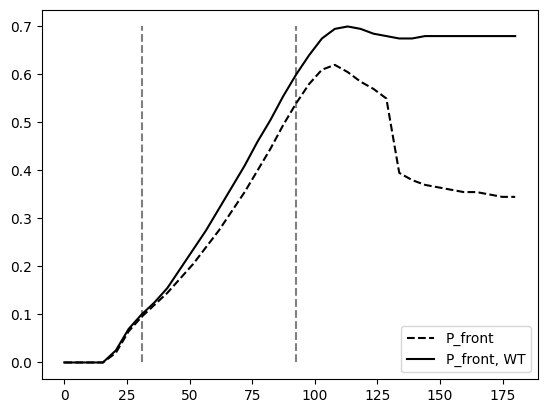

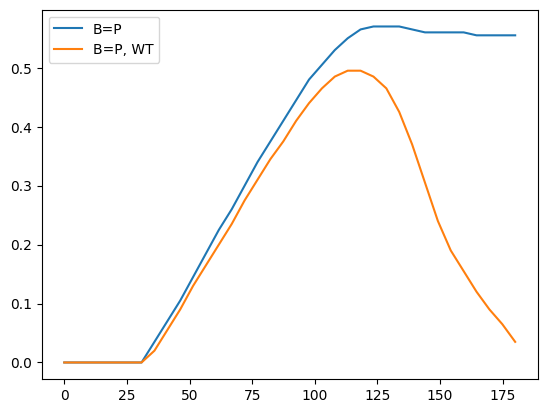

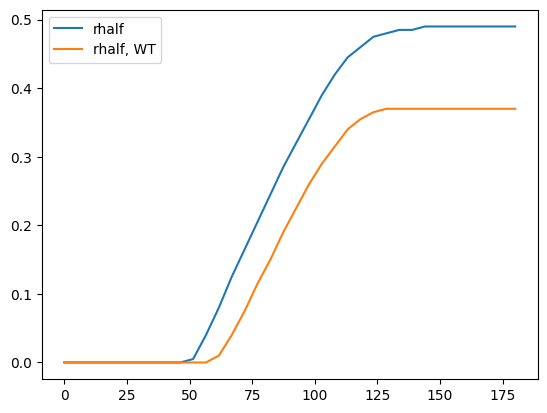

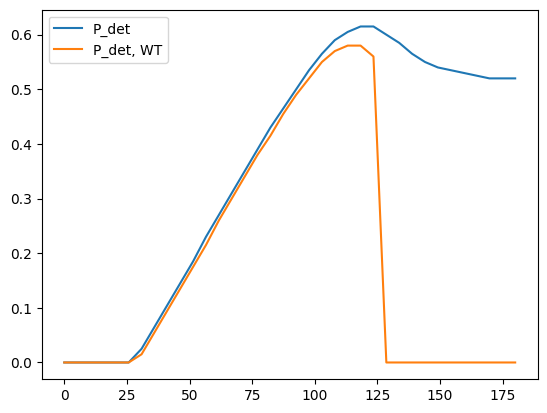

In [16]:
plt.plot(tarr,Pfrontarr,label = "P_front",color = "k",ls = "--")
plt.plot(tarr,Pfrontarr1,label = "P_front, WT",color = "k")
plt.plot(np.ones(10)*expansionstart,np.linspace(0,max(Pfrontarr1),10),ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend,np.linspace(0,max(Pfrontarr1),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()

plt.figure()
plt.plot(tarr,rsuperarr,label = "B=P")
plt.plot(tarr,rsuperarr1,label = "B=P, WT")
plt.legend()

plt.figure()
plt.plot(tarr,rhalfarr,label = "rhalf")
plt.plot(tarr,rhalfarr1,label = "rhalf, WT")
plt.legend()

plt.figure()
plt.plot(tarr,Pdetarr,label = "P_det")
plt.plot(tarr,Pdetarr1,label = "P_det, WT")
plt.legend()


# Some spacy analysis (no need to read further)

/tmp/ipykernel_329280/4070805810.py:4: RuntimeWarning: divide by zero encountered in divide
  tpenetrate = frontdist[:-1]/vPfront
/tmp/ipykernel_329280/4070805810.py:4: RuntimeWarning: invalid value encountered in divide
  tpenetrate = frontdist[:-1]/vPfront
/tmp/ipykernel_329280/4070805810.py:18: RuntimeWarning: divide by zero encountered in divide
  tpenetrate1 = frontdist1[:-1]/vPfront1
/tmp/ipykernel_329280/4070805810.py:18: RuntimeWarning: invalid value encountered in divide
  tpenetrate1 = frontdist1[:-1]/vPfront1


Text(0.5, 1.0, 'MP1')

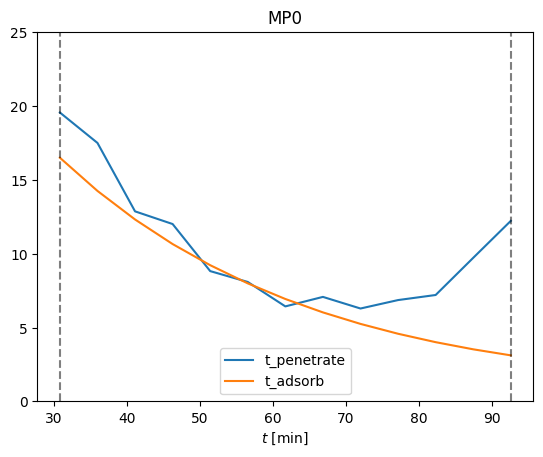

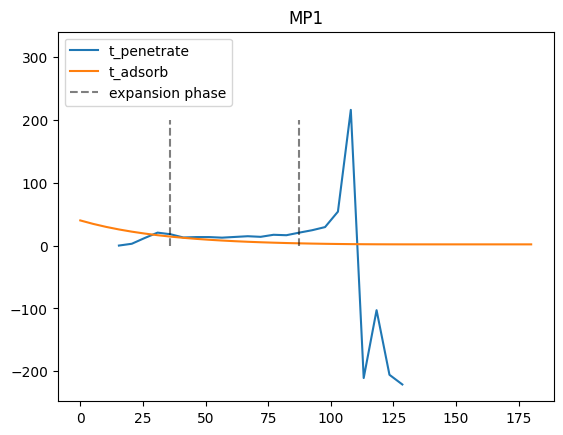

In [25]:
plt.figure()
Bmax = sim[:,0,-1]
frontdist = Pfrontarr-rsuperarr
tpenetrate = frontdist[:-1]/vPfront
tadsorb = (V.eta*Bmax/V.da)**(-1)
plt.plot(tarr[istart:iend+1],tpenetrate[istart:iend+1],label = "t_penetrate")
plt.plot(tarr[istart:iend+1],tadsorb[istart:iend+1],label = "t_adsorb")
plt.plot(np.ones(10)*expansionstart,np.linspace(0,200,10),ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend,np.linspace(0,200,10),ls = "--",color = "k",alpha = 0.5)
plt.ylim(0,25)
plt.xlabel(r"$t$ [min]")
plt.legend()
plt.title("MP0")

plt.figure()
Bmax1 = sim1[:,0,-1]
frontdist1 = Pfrontarr1-rsuperarr1
tpenetrate1 = frontdist1[:-1]/vPfront1
tadsorb1 = (V.eta*Bmax1/V.da)**(-1)
plt.plot(tarr[:-1],tpenetrate1,label = "t_penetrate")
plt.plot(tarr,tadsorb1,label = "t_adsorb")
plt.plot(np.ones(10)*expansionstart1,np.linspace(0,200,10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend1,np.linspace(0,200,10),ls = "--",color = "k",alpha = 0.5)
plt.legend()
plt.title("MP1")

/tmp/ipykernel_329280/2192607808.py:4: RuntimeWarning: divide by zero encountered in divide
  tpenetrate = frontdist[:-1]/vrsuper
/tmp/ipykernel_329280/2192607808.py:4: RuntimeWarning: invalid value encountered in divide
  tpenetrate = frontdist[:-1]/vrsuper


Text(0.5, 1.0, 'MP0')

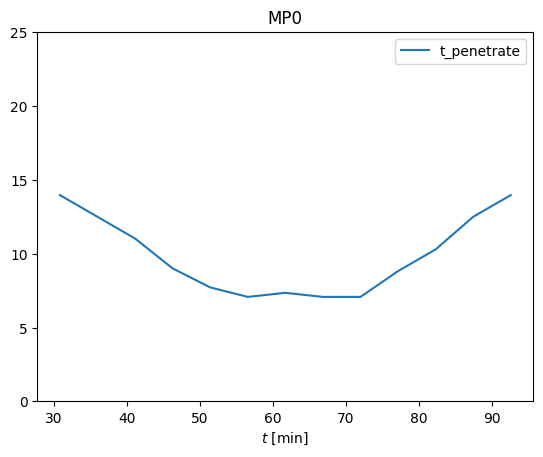

In [24]:
plt.figure()
Bmax = sim[:,0,-1]
frontdist = Pfrontarr-rsuperarr
tpenetrate = frontdist[:-1]/vrsuper
tadsorb = (V.eta*Bmax/V.da)**(-1)
plt.plot(tarr[istart:iend+1],tpenetrate[istart:iend+1],label = "t_penetrate")
plt.ylim(0,25)
plt.xlabel(r"$t$ [min]")
plt.legend()
plt.title("MP0")

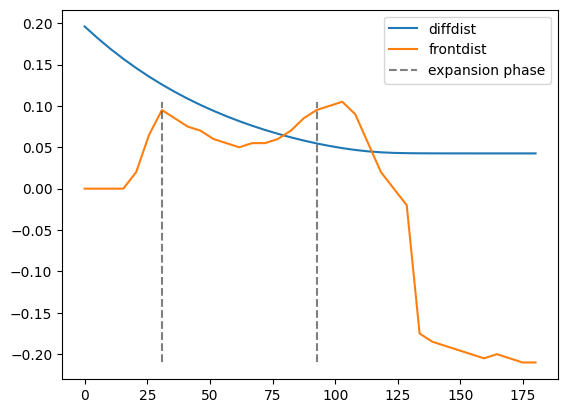

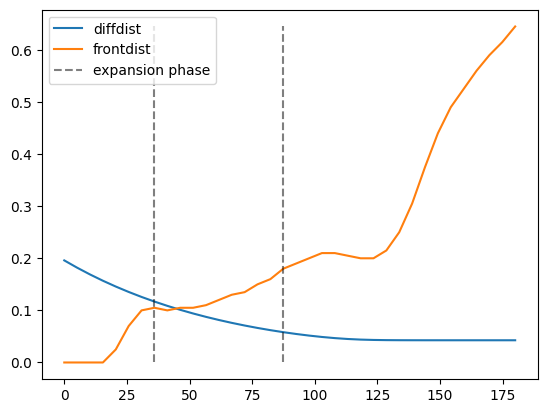

In [14]:
diffdist = 2*np.sqrt(V.DP*tadsorb)/1000
plt.plot(tarr,diffdist,label = "diffdist")
plt.plot(tarr,frontdist,label = "frontdist")
plt.plot(np.ones(10)*expansionstart,np.linspace(min(frontdist),max(frontdist),10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend,np.linspace(min(frontdist),max(frontdist),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()

plt.figure()
diffdist1 = 2*np.sqrt(V.DP*tadsorb1)/1000
plt.plot(tarr,diffdist1,label = "diffdist")
plt.plot(tarr,frontdist1,label = "frontdist")
plt.plot(np.ones(10)*expansionstart1,np.linspace(min(frontdist1),max(frontdist1),10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend1,np.linspace(min(frontdist1),max(frontdist1),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()

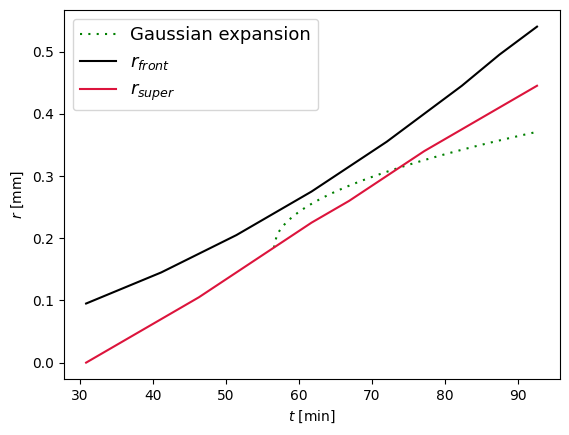

In [15]:
istart = np.where(tarr == expansionstart)[0][0]
iend = np.where(tarr == expansionend)[0][0]
Tarr = tarr[istart:iend+1]-expansionstart
di = 5
Tarr2 = np.linspace(0,expansionend-expansionstart,100)
Tarr3 = np.linspace(Tarr[di],expansionend-expansionstart,100)
#plt.plot(Tarr2+expansionstart,2*np.sqrt(V.DP*Tarr2)/1000+rsuperarr[istart],label = "Gaussian expansion",ls = (0,(1,3)),color = "g")
plt.plot(Tarr3+expansionstart,rsuperarr[istart + di]+2*np.sqrt(V.DP*(Tarr3-Tarr[di]))/1000+rsuperarr[istart],ls = (0,(1,3)),color = "g",label = "Gaussian expansion")
plt.plot(Tarr+expansionstart,Pfrontarr[istart:iend+1],label = r"$r_{front}$",color = "k")
plt.plot(Tarr+expansionstart,rsuperarr[istart:iend+1],label = r"$r_{super}$",color = "crimson")
plt.xlabel(r"$t$ [min]")
plt.ylabel(r"$r$ [mm]")
plt.legend(fontsize = 13)
plt.savefig("Gaussian_w_Pfront.jpg")



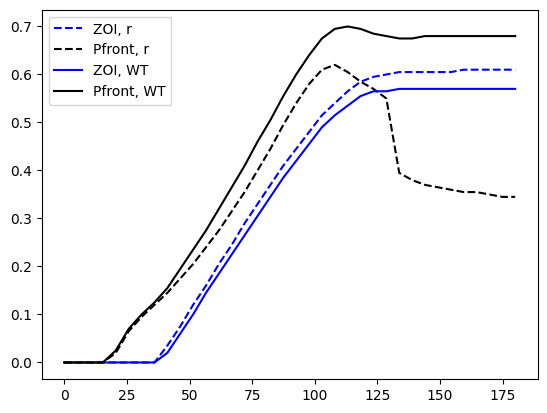

In [16]:
plt.plot(tarr,ZOIarr,color = "blue",ls = "--",label = "ZOI, r")
plt.plot(tarr,Pfrontarr,color = "k",ls = "--",label = "Pfront, r")
plt.plot(tarr,ZOIarr1,color = "blue",label = "ZOI, WT")
plt.plot(tarr,Pfrontarr1,color = "k",label = "Pfront, WT")
plt.legend()

In [17]:
PPfront = np.zeros_like(Pfrontarr)
LPfront = np.zeros_like(Pfrontarr)
for i,f in enumerate(Pfrontarr):
    L = np.sum(sim[i,1:11],axis = 0)
    P = sim[i,-2]
    PPfront[i] = P[np.where(np.isclose(rarr,f,atol = 0.002))[0][0]]
    LPfront[i] = L[np.where(np.isclose(rarr,f,atol = 0.002))[0][0]]
PPfront1 = np.zeros_like(Pfrontarr1)
LPfront1 = np.zeros_like(Pfrontarr1)
for i,f in enumerate(Pfrontarr1):
    P = sim1[i,-2]
    L = np.sum(sim1[i,1:21],axis = 0)
    PPfront1[i] = P[np.where(np.isclose(rarr,f,atol = 0.002))[0][0]]
    LPfront1[i] = L[np.where(np.isclose(rarr,f,atol = 0.002))[0][0]]
P1atfront0 = np.zeros_like(Pfrontarr)
L1atfront0 = np.zeros_like(Pfrontarr)
LI1atfront0= np.zeros_like(Pfrontarr)
for i,f in enumerate(Pfrontarr):
    P = sim1[i,-2]
    L = np.sum(sim1[i,1:11],axis = 0)
    LI= np.sum(sim1[i,11:21],axis = 0)
    P1atfront0[i] = P[np.where(np.isclose(rarr,f,atol = 0.002))[0][0]]
    L1atfront0[i] = L[np.where(np.isclose(rarr,f,atol = 0.002))[0][0]]
    LI1atfront0[i]= LI[np.where(np.isclose(rarr,f,atol = 0.002))[0][0]]

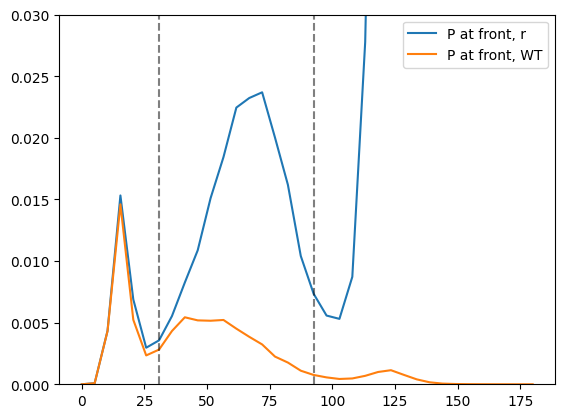

In [18]:
plt.plot(tarr,PPfront ,label = "P at front, r")
plt.plot(tarr,PPfront1,label = "P at front, WT")
plt.plot(np.ones(10)*expansionstart,np.linspace(0,200,10),ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend,np.linspace(0,200,10),ls = "--",color = "k",alpha = 0.5)
plt.ylim(0,0.03)
plt.legend()

In [19]:
(V.eta*0.025/V.da)**(-1)

40.0

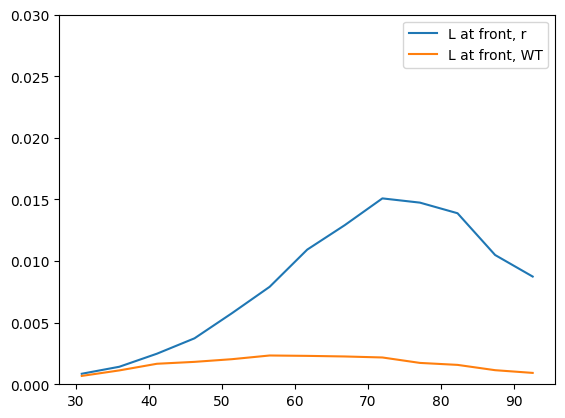

In [20]:
plt.plot(tarr[istart:iend+1],LPfront[istart:iend+1] ,label = "L at front, r")
plt.plot(tarr[istart:iend+1],LPfront1[istart:iend+1],label = "L at front, WT")
#plt.plot(np.ones(10)*expansionstart,np.linspace(0,200,10),ls = "--",color = "k",alpha = 0.5)
#plt.plot(np.ones(10)*expansionend,np.linspace(0,200,10),ls = "--",color = "k",alpha = 0.5)
plt.ylim(0,0.03)
plt.legend()

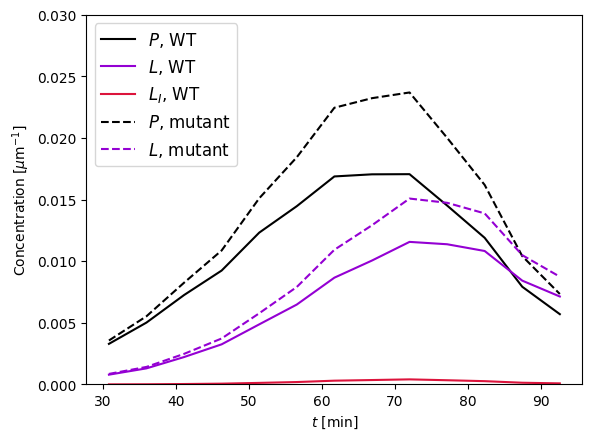

In [21]:
plt.plot(tarr[istart:iend+1],P1atfront0[istart:iend+1],label = r"$P$, WT",color = "k")
plt.plot(tarr[istart:iend+1],L1atfront0[istart:iend+1],label = r"$L$, WT",color = "darkviolet")
plt.plot(tarr[istart:iend+1],LI1atfront0[istart:iend+1],label = r"$L_I$, WT",color = "crimson")
plt.plot(tarr[istart:iend+1],PPfront[istart:iend+1],label = "$P$, mutant",color = "k",ls = "--")
#plt.plot(tarr[istart:iend+1],np.ones(iend-istart+1)*y0[1,0],label = "L_0",color = "k",alpha = 0.3)
plt.plot(tarr[istart:iend+1],LPfront[istart:iend+1],label = "$L$, mutant",color = "darkviolet",ls = "--")
plt.xlabel(r"$t$ [min]")
plt.ylabel("Concentration [$\mu$m$^{-1}$]")
plt.legend(fontsize = 12)
plt.ylim(0,0.03)
plt.savefig("P_L_at_front.jpg")

In [22]:
max(PPfront[istart:iend+1]/P1atfront0[istart:iend+1]),max(LPfront[istart:iend+1]/L1atfront0[istart:iend+1])

(1.3885253525815202, 1.3039265475055313)

# Different diffusion constant

In [23]:
V2 = DVS(dr = 5,Rmax = 5*10**3)
V2.DP *= 4
y02 = IVS("MP0",V2)
t = 3*60
sim2 = MPShell("MP0",y02,V2,t,frames=int(t/5))


 65%|██████▍   | 700946/1080000 [01:38<00:53, 7094.71it/s]


KeyboardInterrupt: 

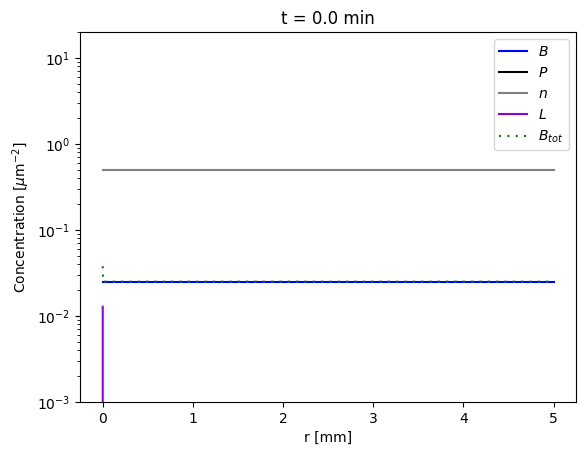

In [25]:
GifGenerator(sim2,V2,t,"MP0",f"MP0_DP={V2.DP}",ylim = (0.001,20),legendloc = "upper right",Btot = True)


In [26]:
rhalfarr2 = rhalf(sim2,False,V2, var = "Btot")
ZOIarr2 = rhalf(sim2,False,V2,var = "B")

Pdetarr2 = Pdet(sim2,V2,y02[0,0])
rsuperarr2 = rsuper(sim2,V2)


In [27]:
frame = 1
Pfrontarr2 = Pfront(sim2,V2,LIN = False)
rarr2 = np.linspace(0,V2.Rmax,V2.l)/1000
y2 = sim2[frame]
gn0          = Gamma(V2.gnmax,V2.n0,V2.Kn)
gn           = Gamma(V2.gnmax,y2[-1],V2.Kn)
beta         = Beta(V2.beta0 ,V2.rb,gn0,gn)
tau          = Tau(V2.tau0   ,V2.rl,gn0,gn)/V2.N
DMP =  V2.DP*Matrix(V2.l)/V2.dr**2
burst = beta*y2[V2.N]/tau
diff = DMP*y2[-2]


#plt.plot(rarr2,burst/diff,label = "Burst/Diffusion")
#plt.plot(rarr2,np.ones_like(y2[-2]),color = "gray",alpha = 0.5)
#plt.plot(np.ones(10)*Pfrontarr1[frame],np.linspace(0,max(abs(beta*y2[V2.N]/tau/(DMP*y2[-2]))),10),color = "k",alpha = 0.3,ls = "--")
#plt.legend()
##plt.ylim(1E-3,max(beta*y2[V2.N]/tau/(DMP*y2[-2]))*1.5)
#plt.yscale("log")
#
#plt.figure()
#plt.plot(rarr2,y2[-2])
#plt.plot(np.ones(10)*Pfrontarr1[frame],np.linspace(0,max(y2[-2]),10),color = "k",alpha = 0.3,ls = "--")

In [28]:
vrhalf2 = (rhalfarr2[1:]-rhalfarr2[:-1])/(tarr[1]-tarr[0])
vPfront2 = (Pfrontarr2[1:]-Pfrontarr2[:-1])/(tarr[1]-tarr[0])
vrsuper2 = (rsuperarr2[1:]-rsuperarr2[:-1])/(tarr[1]-tarr[0])
vPdet2 = (Pdetarr2[1:]-Pdetarr2[:-1])/(tarr[1]-tarr[0])

In [29]:
for i,v in enumerate(vrsuper2):
    if v >= max(vrsuper2)*0.8:
        expansionstart2 = tarr[i]
        break
for i,v in enumerate(vrsuper2[::-1]):
    if v >= max(vrsuper2)*0.85:
        expansionend2 = tarr[-i-2]
        break
expansionstart2,expansionend2

(41.142857142857146, 51.42857142857143)

Text(0.5, 1.0, 'MP0')

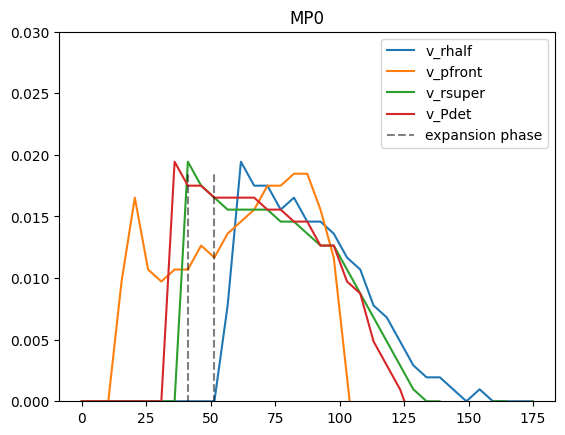

In [30]:
plt.plot(tarr[:-1],vrhalf2,label = "v_rhalf")
plt.plot(tarr[:-1],vPfront2,label = "v_pfront")
plt.plot(tarr[:-1],vrsuper2,label = "v_rsuper")
plt.plot(tarr[:-1],vPdet2,label = "v_Pdet")
plt.plot(np.ones(10)*expansionstart2,np.linspace(min(vPfront2),max(vPfront2),10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend2,np.linspace(min(vPfront2),max(vPfront2),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()
plt.ylim(0,0.03)
plt.title("MP0")

# Different tau0

In [31]:
V3 = DVS(dr = 5,Rmax = 5*10**3)
V3.tau0 /= 4
y03 = IVS("MP0",V3)
t = 3*60
sim3 = MPShell("MP0",y03,V3,t,frames=int(t/5))


100%|██████████| 1080000/1080000 [02:33<00:00, 7029.88it/s]


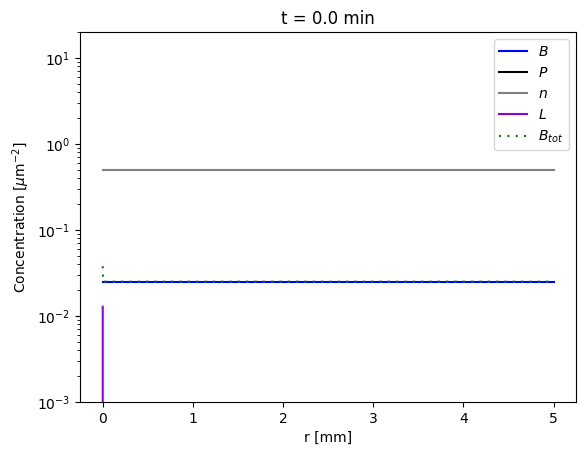

In [32]:
GifGenerator(sim3,V3,t,"MP0",f"MP0_DP={V3.DP}",ylim = (0.001,20),legendloc = "upper right",Btot = True)


In [33]:
rhalfarr3 = rhalf(sim3,False,V3, var = "Btot")
ZOIarr3 = rhalf(sim3,False,V3,var = "B")

Pdetarr3 = Pdet(sim3,V3,y03[0,0])
rsuperarr3 = rsuper(sim3,V3)


In [34]:
frame = 1
Pfrontarr3 = Pfront(sim3,V3,LIN = False)
rarr3 = np.linspace(0,V3.Rmax,V3.l)/1000
y3 = sim3[frame]
gn0          = Gamma(V3.gnmax,V3.n0,V3.Kn)
gn           = Gamma(V3.gnmax,y3[-1],V3.Kn)
beta         = Beta(V3.beta0 ,V3.rb,gn0,gn)
tau          = Tau(V3.tau0   ,V3.rl,gn0,gn)/V3.N
DMP =  V3.DP*Matrix(V3.l)/V3.dr**2
burst = beta*y3[V3.N]/tau
diff = DMP*y3[-2]


#plt.plot(rarr2,burst/diff,label = "Burst/Diffusion")
#plt.plot(rarr2,np.ones_like(y2[-2]),color = "gray",alpha = 0.5)
#plt.plot(np.ones(10)*Pfrontarr1[frame],np.linspace(0,max(abs(beta*y2[V2.N]/tau/(DMP*y2[-2]))),10),color = "k",alpha = 0.3,ls = "--")
#plt.legend()
##plt.ylim(1E-3,max(beta*y2[V2.N]/tau/(DMP*y2[-2]))*1.5)
#plt.yscale("log")
#
#plt.figure()
#plt.plot(rarr2,y2[-2])
#plt.plot(np.ones(10)*Pfrontarr1[frame],np.linspace(0,max(y2[-2]),10),color = "k",alpha = 0.3,ls = "--")

In [35]:
vrhalf3 = (rhalfarr3[1:]-rhalfarr3[:-1])/(tarr[1]-tarr[0])
vPfront3 = (Pfrontarr3[1:]-Pfrontarr3[:-1])/(tarr[1]-tarr[0])
vrsuper3 = (rsuperarr3[1:]-rsuperarr3[:-1])/(tarr[1]-tarr[0])
vPdet3 = (Pdetarr3[1:]-Pdetarr3[:-1])/(tarr[1]-tarr[0])

In [36]:
for i,v in enumerate(vrsuper3):
    if v >= max(vrsuper3)*0.8:
        expansionstart3 = tarr[i]
        break
for i,v in enumerate(vrsuper3[::-1]):
    if v >= max(vrsuper3)*0.85:
        expansionend3 = tarr[-i-2]
        break
expansionstart3,expansionend3

(15.42857142857143, 97.71428571428572)

Text(0.5, 1.0, 'MP0')

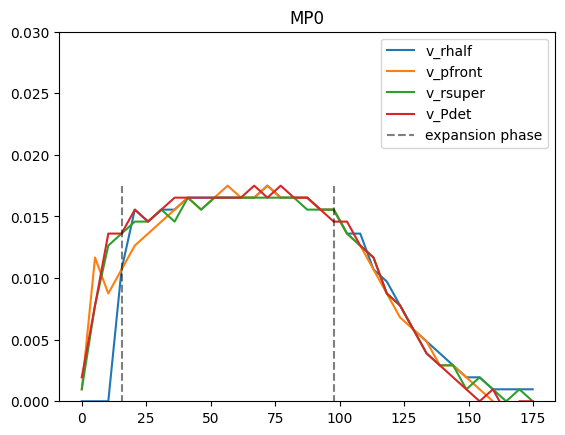

In [37]:
plt.plot(tarr[:-1],vrhalf3,label = "v_rhalf")
plt.plot(tarr[:-1],vPfront3,label = "v_pfront")
plt.plot(tarr[:-1],vrsuper3,label = "v_rsuper")
plt.plot(tarr[:-1],vPdet3,label = "v_Pdet")
plt.plot(np.ones(10)*expansionstart3,np.linspace(min(vPfront3),max(vPfront3),10),label = "expansion phase",ls = "--",color = "k",alpha = 0.5)
plt.plot(np.ones(10)*expansionend3,np.linspace(min(vPfront3),max(vPfront3),10),ls = "--",color = "k",alpha = 0.5)
plt.legend()
plt.ylim(0,0.03)
plt.title("MP0")